In [26]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import datetime as dt
font={
    'size':20
}
sns.set(style="white", color_codes=True)

In [42]:
data = pd.read_csv(r"C:\Users\Me\Desktop\ProjectSem7\Arvind2000.csv")

In [43]:
data.head()


,data,normed data
0,0.25,0.162429
1,0.00,0.139418
2,0.32,0.169340
3,0.34,0.171353
4,0.78,0.220020


In [44]:
df = pd.DataFrame({
...    'orignal': data['data'],
...    'normal': data['normed data']
...    }, index=data.index)

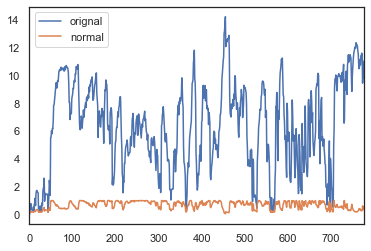

In [45]:
lines = df.plot.line()

In [87]:
import math


# temp = [1,2,3,4,5,6,7,8,9,0,1,1,1,2,3,2,1,3,1,4,2,1,12,3,1,12,1,23,12,2,1,1,2,0,12,0,31,4,1,2,1]

class DualSlidingWindow:
    def __init__(self, window_size,file, data, threshold):
        self.window_size = window_size
        self.file = file
        self.data = data
        self.anchor = list()
        self.threshold = threshold
        self.data_len = len(data)
        self.avg_mal_dis = 0
        
    def mahalonobis_distance(self, mean1, mean2, var1, var2):
        return ((mean1-mean2)**2)*((1/(2*var1))+(1/(2*var2)))
    
    def sliding_window(self):
        i= 0
        avg_mal_distance = list()
        j= i + self.window_size
        k= j + self.window_size
        while k<len(self.data):
            try:
                w1 = self.data[i:j]
                w2 = self.data[j:k]
                mahalonobis_dis = self.mahalonobis_distance(np.mean(w1), np.mean(w2), np.var(w1), np.var(w2))
#                 print(w1,w2,mahalonobis_dis)
                
                if math.isinf(mahalonobis_dis):
                    i+=1
                    j+=1
                    k+=1
                elif math.isnan(mahalonobis_dis):
                    i+=1
                    j+=1
                    k+=1
                elif mahalonobis_dis > self.threshold:
                    self.anchor.append(j)
                    i+=self.window_size
                    j+=self.window_size
                    k+=self.window_size
                    avg_mal_distance.append(mahalonobis_dis)
                else:
                    i+=1
                    j+=1
                    k+=1
                    avg_mal_distance.append(mahalonobis_dis)
            except:
                print("except")
#         print(self.anchor)
        self.avg_mal_dis = sum(avg_mal_distance)/len(self.data)
        print(self.avg_mal_dis)
    
    
        
                
    def plotting(self):
        plt.figure(figsize=(30,15))
        i= 0 
        while i<len(self.anchor)-2:
            x = self.file.loc[self.anchor[i]:self.anchor[i+1],]
            plt.plot(x.index, x["normed data"], linewidth=2)
#             print(x)
            i = i + 1
        st = "At " + str(self.threshold)

0.9201532448117345


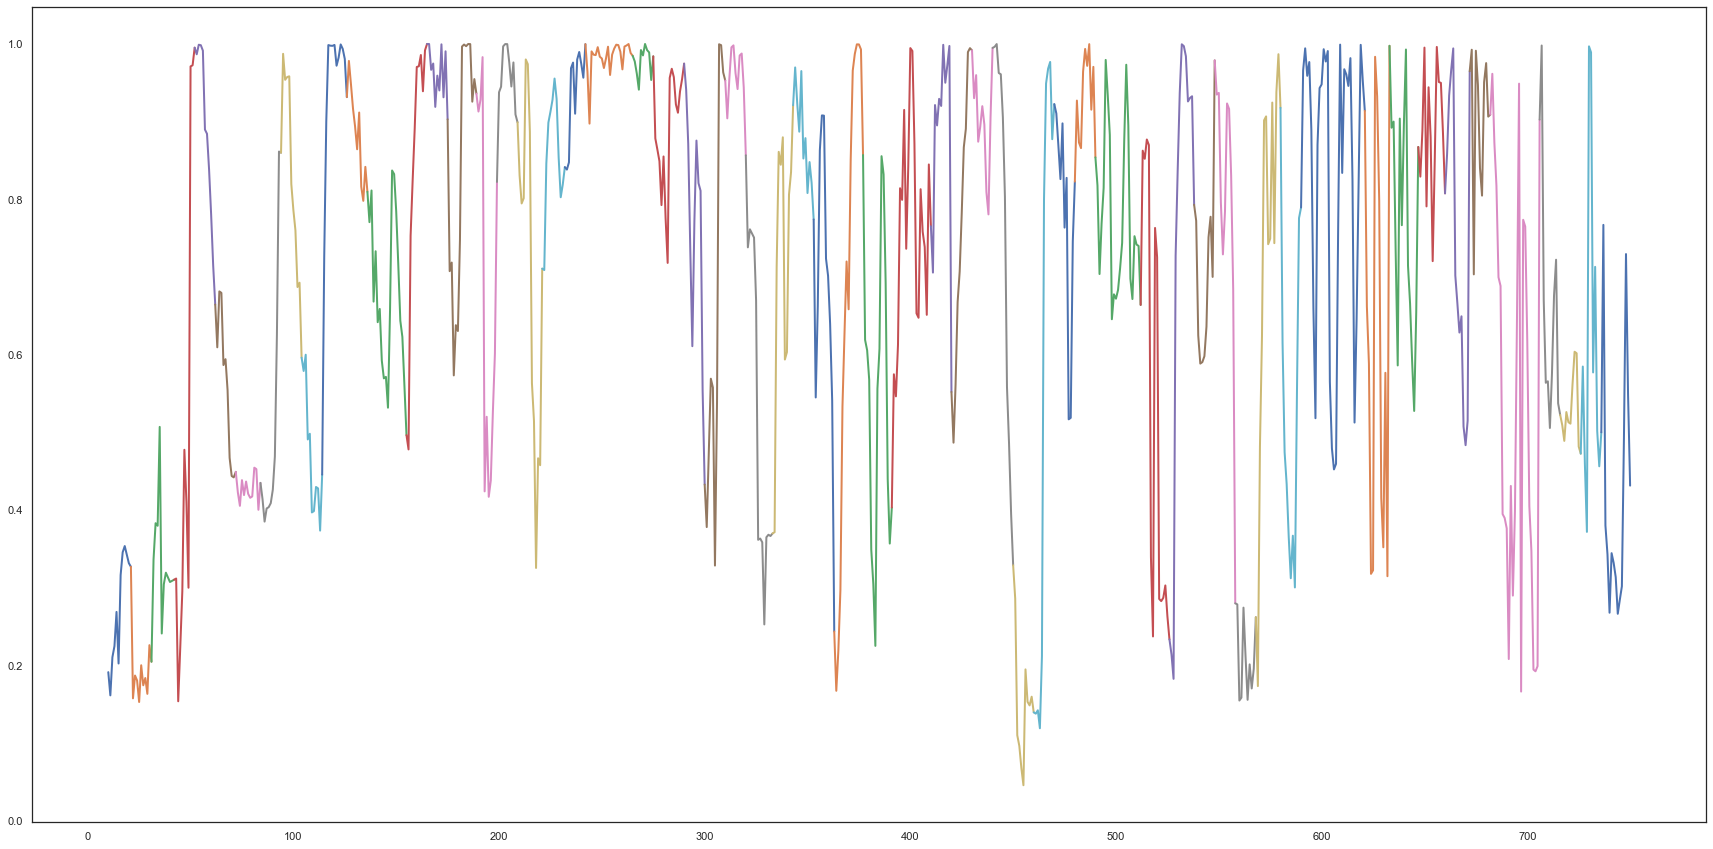

In [93]:
s = DualSlidingWindow(10,data, data['normed data'],0.920)
s.sliding_window()
s.plotting()